<a href="https://colab.research.google.com/github/WeizmannML/course2020/blob/master/Tutorial2/Pytorch_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch.utils import data
from torch import nn

from utils.data.dataset import MyPoints
from utils.models.simple_classifier import SimpleClassifier

In [37]:
#plt.plot( [1,2], [1, 2] )

### Create a 2-feature dataset

In [38]:
# First we create the point that we are going to use for the classifier.
# We create n_points points for four classes of points center at [0,0], 
# [0,2], [2,0] and [2,2] with a deviation from the center that follows a
# Gaussian distribution with a standar deviation of sigma.

n_points = 20000
points = np.zeros((n_points,2))   # x, y
target = np.zeros((n_points,1))   # label
sigma = 0.5
for k in range(n_points):
    # Random selection of one class with 25% of probability per class.
    random = np.random.rand()
    if random<0.25:
        center = np.array([0,0])
        target[k,0] = 0   # This points are labeled 0.
    elif random<0.5:
        center = np.array([2,2])
        target[k,0] = 1   # This points are labeled 1.
    elif random<0.75:
        center = np.array([2,0])
        target[k,0] = 2   # This points are labeled 2.
    else:
        center = np.array([0,2])
        target[k,0] = 3   # This points are labeled 3.
    gaussian01_2d = np.random.randn(1,2)
    points[k,:] = center + sigma*gaussian01_2d

# Now, we write all the points in a file.
points_and_labels = np.concatenate((points,target),axis=1)   # 1st, 2nd, 3nd column --> x,y, label
pd.DataFrame(points_and_labels).to_csv('clas.csv',index=False)

### Creating custom dataset builder

In [39]:
# -- use the custom dataset builder to read the saved file --- #
my_data = MyPoints('clas.csv')

In [40]:
test_data = my_data[2]

In [41]:
test_data

(tensor([ 0.6363, -0.0229]), tensor([0.]))

In [42]:
lr=0.1
batch_size = 100

my_loader = data.DataLoader(my_data,batch_size=batch_size,num_workers=0)

model = SimpleClassifier()

# Negative log likelihood loss.
criterium = nn.NLLLoss()

In [43]:
loss_array, pred_array = model.fit_transform(my_loader, criterium, lr)

torch.Size([100, 2])
tensor([[-2.6539e-02, -2.4249e-01],
        [ 2.4689e+00,  1.0379e-02],
        [ 6.3627e-01, -2.2948e-02],
        [ 2.0647e+00,  7.6437e-01],
        [-1.8910e-01,  1.9701e+00],
        [-9.5904e-02,  1.7992e+00],
        [ 1.9115e+00,  2.0005e+00],
        [-7.5542e-01,  4.7700e-01],
        [-5.8205e-01,  2.4978e+00],
        [ 2.6415e+00,  2.2476e+00],
        [ 2.3889e+00,  1.7163e-01],
        [ 1.0361e+00,  8.8892e-01],
        [-6.0936e-01,  1.5989e+00],
        [ 2.1892e-02, -2.5361e-01],
        [ 1.9464e+00,  7.8091e-01],
        [ 2.2691e+00,  2.1550e+00],
        [-9.7357e-01,  2.7492e+00],
        [ 4.7404e-01, -8.3097e-02],
        [ 1.0960e+00, -9.1785e-01],
        [-2.3202e-01,  1.4973e-01],
        [ 1.8301e+00, -5.6975e-01],
        [-3.6234e-01, -1.7355e-01],
        [-7.7342e-01,  1.3598e+00],
        [ 2.2791e-01,  2.4555e+00],
        [ 1.2512e+00,  4.4952e-01],
        [ 3.0016e-02, -5.1342e-01],
        [ 2.1469e+00,  2.0699e+00],
       

In [44]:
# def train(batch_size, my_data, model, criterium, learning_rate, wheight_decay):

    
#     my_loader = data.DataLoader(my_data,batch_size=batch_size,num_workers=0)

#     # Now, we create the mode, the loss function or criterium and the optimizer 
#     # that we are going to use to minimize the loss.
    

#     # Adam optimizer with learning rate 0.1 and L2 regularization with weight 1e-4.
#     optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=1e-4)


#     loss_array = []
#     epoch = 0

#     # Taining.
#     for k, (d, t) in enumerate(my_loader):
#         # Definition of inputs as variables for the net.
#         # requires_grad is set False because we do not need to compute the 
#         # derivative of the inputs.

#         d = Variable(d,requires_grad=False)
#         t = Variable(t.long(),requires_grad=False)

#         # Set gradient to 0.
#         optimizer.zero_grad()
#         # Feed forward.
#         pred = model(d)
#         print(pred.shape)
#         # Loss calculation.
#         loss = criterium(pred,t.view(-1))
        
#         loss_array.append(loss.item() )
#         # Gradient calculation.
#         loss.backward()
        
#         # Print loss every 10 iterations.
#         if k%10==0:
#             print('Loss {:.4f} at iter {:d}'.format(loss.item(),k))
            
#         # Model weight modification based on the optimizer. 
#         optimizer.step()
        
#         epoch += 1

#     return 

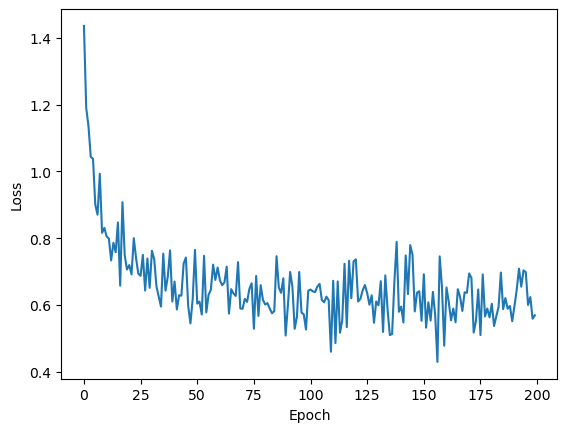

In [45]:
plt.plot( np.arange(0, round(n_points/batch_size), 1), np.array(loss_array))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

[2.46894303 0.01037883]
Reached here


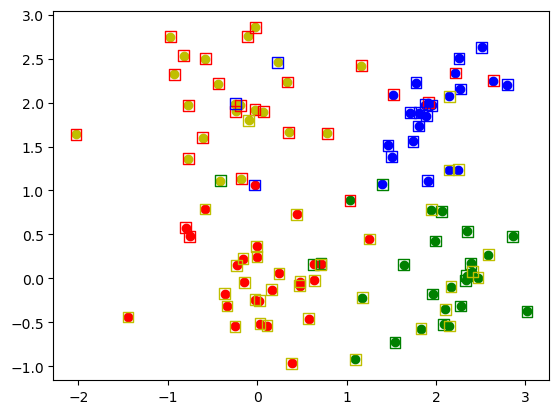

In [46]:
# Now, we plot the results.
# Circles indicate the ground truth and the squares are the predictions.

colors = ['r','b','g','y']
points = points[:100, :]
print(points[1, :])

print('Reached here')

# Ground truth.
t = target[:100, :]
for k in range(4):
    select = t[:,0]==k
    p = points[select,:]
    plt.scatter(p[:,0],p[:,1],facecolors=colors[k])

# Predictions.
pred = pred_array[0].exp().detach()     # exp of the log prob = probability.
_, index = torch.max(pred,1)   # index of the class with maximum probability.
pred = pred.numpy()
index = index.numpy()
for k in range(4):
    select = index==k
    p = points[select,:]
    plt.scatter(p[:,0],p[:,1],s=60,marker='s',edgecolors=colors[k],facecolors='none')

plt.show()